# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000022AB2DA0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000022FF4898>]], dtype=object)

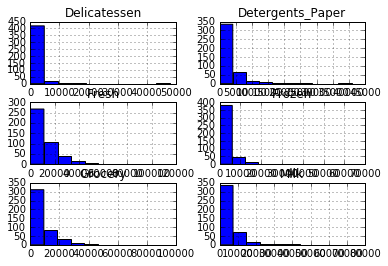

In [54]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import time
import math
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows
pd.DataFrame.hist(data)

##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer:

###PCA 
Our data contains the annual spending data of 440 customers on six different groups of items. Principal Component Analysis aims to reduce the dimensions of our data by finding the orthogonal dimensionsthat explain the most variance in our data and rank them from most to least. Given that we are looking at the annual spending in monetary units I expect that the PCA will return the dimensions (from most to lest) that affect the revenue of our business. As such I expect the PCA to return dimensions where it has "grouped" certain product types together based on the clients' purchasing behaviour and ultimately the clients' customer market. For example certain clients may focus on milk and other grocery items and thus add these together. Similarly I expect a dimension to return which will resemble the delicatessen items, as these may be seen as a luxury market and thus we expect more niche clients' to purchase them as opposed to big cornershop, high turnover grocers.

###ICA
Independent Component Analysis aims to maximise the independence between our data dimensions. I expect that the ICA will return dimensions that signify the different customer types: fresh foods vs. milk and grocery vs. delicatessen etc.


In [55]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(data)
# Print the components and the amount of variance in the data contained in each dimension
print 'PCA Components'
print pca.components_
print 'PCA explained Variance Ratio'
print pca.explained_variance_ratio_

PCA Components
[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
PCA explained Variance Ratio
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: The first two dimensions in PCA explains roughly 86.5% of the variance in the dataset. The third vector adds and additional 7% and the 4th vector 4.4%, which gets us to roughly 98%. I expect that I will use 3 or 4 dimensions, specifically because this will ensure we capture the data from the smaller customers which the client started losing once they changed their delivery method. If two customer groups explain 86.5% of the variance, then these mustbe large groups. The smaller groups will then be captured by the third and fourth PCA (and further) dimensions.

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: The dimensions seems to reflect the purchasing styles of the customers. The first dimension has a large weighting towards the fresh produce items as can be seen from the -0.97 value in PCA(1,1) (PCA vector matrix row 1 column 1). The second matrix seems to represent a group of customers byuing milk, grocery and detergents_paper. The third dimension focuses more on milk, frozen foods and delicatessen. 

PCA allows us to reduce the dimensions of our data. Thus instead of using 6 dimensions throughout our modelling, we can decide on the appropriate amount of variance we want to capture and use a smaller number of dimensions, making the modelling exercise easier. For example, in stead of focussing on all products that our customers buy in an unlabelled data set, we can use PCA to reduce the dimensions and effectively use clustering to help us focus on the types of customers based on their shopping behaviour.

###ICA

In [56]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
from sklearn import preprocessing


#scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True).fit(data)
scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True).fit(data)
centeredData = scaler.transform(data)


ica = FastICA(whiten=True,random_state = 42)
ica.fit(centeredData)

# Print the independent components
print ica.components_

[[-0.0109083  -0.00108579  0.00730777  0.05405594 -0.00254136 -0.01675677]
 [ 0.00253788 -0.0123283   0.06912878  0.00142375 -0.01374853 -0.00544097]
 [-0.00490605 -0.00153897 -0.00562146 -0.002525    0.00238444  0.05092947]
 [-0.00336282  0.01863001  0.10899024 -0.00723244 -0.13338644 -0.0160228 ]
 [-0.05026646  0.00647203  0.00748246  0.00322414 -0.01147139  0.0027079 ]
 [-0.00193854 -0.07245463  0.05647623  0.0016736  -0.0171404   0.01695592]]


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: The ICA returns vectors representing the coefficients to be used in each linear combination of the orriginal six dimensions to form new dimensions which will be "maximally independent". Thus we can apply this transformation to our data to give six new dimentions which will better represent six different client types. The below matrix is the ica.componets:

 fresh	       milk	         grocery    frozen	  detergent	  delicatessen
 
 [-0.0109083  -0.00108579  0.00730777  0.05405594 -0.00254136 -0.01675677]
 
 [ 0.00253788 -0.0123283   0.06912878  0.00142375 -0.01374853 -0.00544097]
 
 [-0.00490605 -0.00153897 -0.00562146 -0.002525    0.00238444  0.05092947]
 
 [-0.00336282  0.01863001  0.10899024 -0.00723244 -0.13338644 -0.0160228 ]
 
 [-0.05026646  0.00647203  0.00748246  0.00322414 -0.01147139  0.0027079 ]
 
 [-0.00193854 -0.07245463  0.05647623  0.0016736  -0.0171404   0.01695592]

The first vector shows clients predominantly focussed on buying frozen foods with a negative tendency to purchase fresh produce and delicatessen. Negative tendency refers to a negative correlation between the products, thus someone who purchases frozen foods will not buy fresh produce and vice versa. The second is mainly focussed with clients buying grocery items and there is a small negative correlation with milk and detergents. The third vector represents clients mainly focussed on buying delicattessen. The fourth vector shows clients mainly focussed on grocery items and a large negative correlation with detergents and a smaller negative correlation with fresh produce. The fifth vector shows shoppers spending on milk,grocery frozen items and delicatessen vs fresh and detergents. The sixth shows clients focussed on grocery items vs milk.

The vectors can be used to build data for new client types which we can then label and specifically design experiments for. The client types will be based on client purchasing behaviour.

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: K Means clustering is a form of unsupervised learning that allows us to form clusters in a set of unlabelled data to help make sense of the data. The user has to select the number of clusters, K, and then the algorithm aims to find the central points (centroids) in the clusters. An advantage of K Mean Clustering is that it is very scalable and fast and can thus be fitted on large sets of data. Furthermore, K Means can thus also help us to identify data better which may be used as a pre-processing step before we go into supervised learning, in other words it can help us label unlabelled data.

K Means clustering performs hard assignments, thus each point will be assigned to a central point (centroid) or cluster. However, this may not always be ideal as a small change in a data point can easily move it to another cluster if it sits on the edge. Gaussian Mixture Models on the other hand performs a soft assignment in that it assigns a probability to each point of being associated with a cluster. Whereas K Means Clustering tends to form cirular clusters, GMM allows us to form clusters that are not circular, something which may help when the data indicates that clusters are most likely not circular. This can be seen when we look at our clustering on a K Means basis and on a GMM basis below. In terms of speed GMM is the fastest algorithm for learning Mixture Models. However, playing around with the number of centroids reveals that as k increases K Means tend to be faster than GMM.

I am choosing Gaussian Mixture Models, specifically because of the soft fitting ability, which I view as important in a dataset where we have a number of customer types and where they are not clearly separable by one straight line, which is what K Means will do.


**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [57]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

PCA transformed data
[[ 1.37937462 -0.30383791]
 [ 1.43480713  0.53814669]
 [ 1.50395108  1.22615334]
 [-0.82413256  1.20577046]
 [ 0.79738815  1.75698625]
 [ 0.88553197  0.13083381]
 [ 0.60531757 -0.45612922]
 [ 1.14750348  0.60637654]
 [ 0.53151843 -0.62521449]
 [ 2.1894146   0.32762966]]


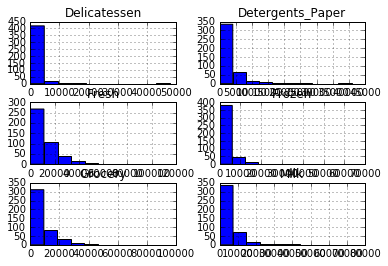

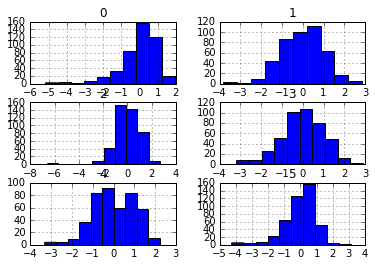

In [58]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
pca = PCA(n_components=2)
#pca.fit(data)

#plot data to show how skewed it is

pd.DataFrame.hist(data)
#given our data is so skewed to the right and seems to be from a lognormal distribution, as the reveiwer suggested
logData = data.apply(np.log)

#scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True).fit(data)
scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True).fit(logData)
centeredData = scaler.transform(logData)

#convert numpy.ndarray to Dataframe using code I found on stackoverflow
logcenteredData = pd.DataFrame(centeredData) #.apply(np.log)


pd.DataFrame.hist(logcenteredData) #nice normal data...

#here we do PCA on our centralised normalised data
pca.fit(logcenteredData)
reduced_data = pca.transform(logcenteredData)
print 'PCA transformed data'
print reduced_data[:10]  # print upto 10 elements

In [59]:

# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'



#clusters = KMeans(n_clusters=2)
clusters = GMM(n_components=2)
clusters.fit(reduced_data)

print clusters

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)


In [60]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [61]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 



if clusters.__class__.__name__ == 'KMeans':
    centroids = clusters.cluster_centers_ #this is for K Means
else:
    centroids = clusters.means_ # this is for GMM
print 'log scaled PCA centroids'
print centroids
print ''

print 'log scaled centroids'
logscaledcentroids = pd.DataFrame(pca.inverse_transform(centroids))

print logscaledcentroids
print ''

print 'log centroids'
logcentroids = pd.DataFrame(scaler.inverse_transform(logscaledcentroids))
print logcentroids
print ''

print 'original centroids'
originalcentroidss = pd.DataFrame(logcentroids).apply(np.exp)
print originalcentroidss
print ''



log scaled PCA centroids
[[-0.518991    0.25949809]
 [ 0.70385545 -0.35193124]]

log scaled centroids
          0         1         2         3         4         5
0  0.207527 -0.246884 -0.298334  0.224786 -0.303947  0.027487
1 -0.281448  0.334825  0.404601 -0.304855  0.412213 -0.037278

log centroids
          0         1         2         3         4         5
0  9.037350  7.854378  8.108555  7.589814  6.263468  6.701123
1  8.314454  8.482703  8.892259  6.910243  7.494592  6.616324

original centroids
             0            1            2            3            4           5
0  8411.454976  2576.992644  3322.773378  1977.945314   525.036360  813.318498
1  4082.456737  4830.489578  7275.438679  1002.490965  1798.291801  747.193195



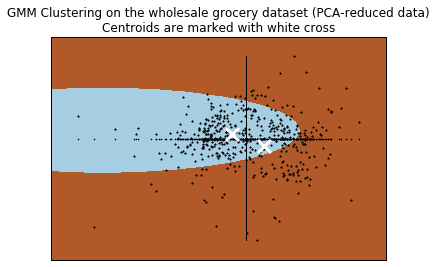

In [62]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k*', markersize=2)
plt.plot(reduced_data[:, 0], np.zeros(reduced_data[:, 0].shape[0]), 'k+', markersize=2) #plotting the first post PCA dimension
plt.plot(np.zeros(reduced_data[:, 1].shape[0]), reduced_data[:, 1], 'k-', markersize=2) #plotting the second post PCA dimension
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('GMM Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

Best model using Bayesian Information Criterion is the one where the BIC is the smallest
BIC recognises that we can improve increase the likelihood by increasing the number of parameters
but in doing so we may overfit, and thus additional parameters are penalised by BIC
GMM(covariance_type='spherical', init_params='wmc', min_covar=0.001,
  n_components=3, n_init=1, n_iter=100, params='wmc', random_state=42,
  thresh=None, tol=0.001, verbose=0)


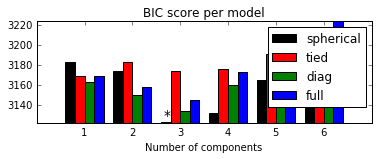

Post PCA centroids
[[-1.05155515  0.26202445]
 [ 1.2399565   0.07665934]
 [-0.44486673 -0.80014662]]
original centroids
             0            1             2            3            4  \
0  9153.865435  1887.112254   2366.316839  2178.218961   316.845219   
1  5462.537993  7032.877417  10208.328853  1260.510251  2841.650204   
2  3297.327997  2310.922899   3509.478089   875.783664   638.248056   

             5  
0   702.667635  
1  1167.872626  
2   397.756370  



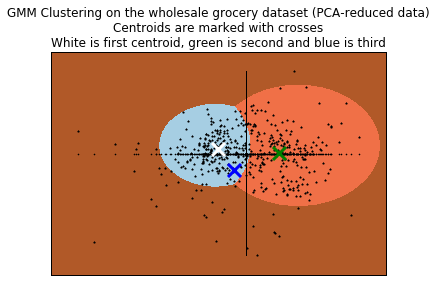

In [63]:
#Check the BIC score using code from scikit learn
#using the reduced data
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a mixture of Gaussians with EM
        gmm = mixture.GMM(n_components=n_components, covariance_type=cv_type, random_state = 42)
        gmm.fit(reduced_data)
        bic.append(gmm.bic(reduced_data))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['k', 'r', 'g', 'b', 'c', 'm', 'y'])
clf = best_gmm
print 'Best model using Bayesian Information Criterion is the one where the BIC is the smallest'
print 'BIC recognises that we can improve increase the likelihood by increasing the number of parameters'
print 'but in doing so we may overfit, and thus additional parameters are penalised by BIC'
print clf
bars = []

# Plot the BIC scores
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

plt.show()

clf.fit(reduced_data)
centroids = clf.means_ # this is for GMM
print 'Post PCA centroids'
print centroids

logscaledcentroids = pd.DataFrame(pca.inverse_transform(centroids))

logcentroids = pd.DataFrame(scaler.inverse_transform(logscaledcentroids))


print 'original centroids'
originalcentroidss = pd.DataFrame(logcentroids).apply(np.exp)
print originalcentroidss
print ''


# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k*', markersize=2)
plt.plot(reduced_data[:, 0], np.zeros(reduced_data[:, 0].shape[0]), 'k+', markersize=2) #plotting the first post PCA dimension
plt.plot(np.zeros(reduced_data[:, 1].shape[0]), reduced_data[:, 1], 'k-', markersize=2) #plotting the second post PCA dimension
plt.scatter(centroids[0, 0], centroids[0, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.scatter(centroids[1, 0], centroids[1, 1],
            marker='x', s=169, linewidths=3,
            color='g', zorder=10)
plt.scatter(centroids[2, 0], centroids[2, 1],
            marker='x', s=169, linewidths=3,
            color='b', zorder=10)
plt.title('GMM Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with crosses\n'
          'White is first centroid, green is second and blue is third'   )
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.


Answer: Based on the PCA's first two components we identified firstly clients which tend to purchase fresh foods. The second group will be those clients focussed on buying milk, grocery and detergents_paper. The x axis represents our first PCA dimension which accounts for 45% of the variance and the y axis our second dimension.

GMM Clustering Centroids transformed back into data (2 clusters)

    0            1            2            3            4           5
             
0  4082.456737  4830.489578  7275.438679  1002.490965  1798.291801  747.193195

1  8411.454976  2576.992644  3322.773378  1977.945314   525.036360  813.318498

K Means Clustering Centroids transformed back into original data (2 clusters)

    0            1             2            3            4           5
             
0  8589.526447  1763.019444   2229.911481  2069.821903   292.879270   643.241057

1  3988.669837  8000.950611  12352.641122   947.599609  3900.134114   1023.885173

GMM Clustering Centroids using BIC (3 clusters spherical)
    0            1             2            3            4           5
             
0  9153.865435  1887.112254   2366.316839  2178.218961   316.845219   702.66

1  5462.537993  7032.877417  10208.328853  1260.510251  2841.650204   1167.87

2  3297.327997  2310.922899   3509.478089   875.783664   638.248056   397.75

So analysing the results of our GMM model which we determined using BIC (thus 3 clusters), we can see that the first group of customers are predominantly focussed on fresh produce and then spend around 66% of this amount spread equally between milk, grocery and frozen foods. The second group focusses heavily on fresh, milk and grocery in the ratio 5:7:10. The third group is a smaller client group, but they spend roughly 3:2:3.5 on fresh, milk and grocery items. In my view the client can design tests for these three client groups.

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: The GMM method has given me the most insight. When I plot the first PCA vector on the x-axis I can clearly see that the GMM wants to identify this cluster. This becomes even more evident when we increase the number of components to 3. KMeans on the other hand just drew a straight line through the data, whereas the GMM model gave something which felt and looked better based on the PCA. Furthermore, as I increased the number of clusters GMM returned something which made more sense.

**9)** How would you use that technique to help the company design new experiments?

Answer: Once we have clustered our clients and so essentialy group them based on their behaviouralised spending, we can delve further into the data to determine when they purchase their stock and how frequently. We can then design tests for the specific client groups which will allow us to build and enhance our strategy for each client group. For example we can now perform separate tests between the client groups to test the impact of a new delivery mechanism and cater the change in our organisation to better benefit our clients. Obviously, if we see that the overall benefit to the firm from a cost point of view outweighs the impact on our revenues it becomes an interesting point to debate specifically between finance and sales.

In terms of an A/B test we can do the following: Let's take the third customer group (3rd centroid from our GMM fit). If we want to implement a new delivery method we can send customer surveys to our clients to discern what the preferences of the clients in this group are. We can then get the top two preferences and after we split the customer group into two, test both preferences (or our implementation based on what works for us) on these customers. We will then be able to see where we get better results or worse results from each group. Alternatively we can do another survey. The group which returns the best result in the A/B test will point to the method which yields the best results and which we should implement for the entire customer group.

We can do this for the other customer groups too simply by splitting the groups into two and testing two items at the same time to get the best result. It can even be testing the current vs a new method in order to minimise disruption on our client base until we are satisfied that something works.


**10)** How would you use that data to help you predict future customer needs?

Answer: Future customer needs can now also be predicted by analysing a change in customer cluster behaviour. For instance if we start observing a shift in our smaller client base to start focussing more on delicatessen, we can probably anticipate that this will happen throughout the whole cluster. This will allow us to adjust our inventory strategies to meet the changes in demand from our clients. 

There are other examples that we can also explore once we have a better grip on our customers, but it starts off with clustering the customers and then diving into the data we have available for each cluster to try and make sense of what customers will do in future.

Done!
Fitting time (secs): 0.020
[[-1.14569033  0.17245073]
 [ 1.53571257 -0.23115737]]
original centroids
             0            1             2            3            4  \
0  8589.526447  1763.019444   2229.911481  2069.821903   292.879270   
1  3988.669837  8000.950611  12352.641122   947.599609  3900.134114   

             5  
0   643.241057  
1  1023.885173  



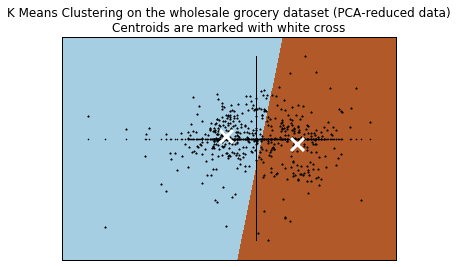

In [64]:
#Plot K Means
start = time.time()
KMCluster = KMeans(n_clusters=2)
KMCluster.fit(reduced_data)
end = time.time()
print "Done!\nFitting time (secs): {:.3f}".format(end - start)



# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = KMCluster.predict(np.c_[xx.ravel(), yy.ravel()])

# TODO: Find the centroids for KMeans or the cluster means for GMM 

if KMCluster.__class__.__name__ == 'KMeans':
    centroids = KMCluster.cluster_centers_ #this is for K Means
else:
    centroids = KMCluster.means_ # this is for GMM
print centroids

logscaledcentroids = pd.DataFrame(pca.inverse_transform(centroids))

logcentroids = pd.DataFrame(scaler.inverse_transform(logscaledcentroids))


print 'original centroids'
originalcentroidss = pd.DataFrame(logcentroids).apply(np.exp)
print originalcentroidss
print ''


# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k*', markersize=2)
plt.plot(reduced_data[:, 0], np.zeros(reduced_data[:, 0].shape[0]), 'k+', markersize=2) #plotting the first post PCA dimension
plt.plot(np.zeros(reduced_data[:, 1].shape[0]), reduced_data[:, 1], 'k-', markersize=2) #plotting the second post PCA dimension
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K Means Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

Done!
Fitting time (secs): 0.033
[[ 0.70385545 -0.35193124]
 [-0.518991    0.25949809]]
original centroids
             0            1            2            3            4           5
0  4082.456737  4830.489578  7275.438679  1002.490965  1798.291801  747.193195
1  8411.454976  2576.992644  3322.773378  1977.945314   525.036360  813.318498



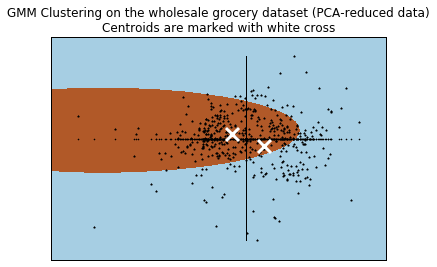

In [65]:
#Plot GMM
start = time.time()
GMMCluster = GMM(n_components=2)
GMMCluster.fit(reduced_data)
end = time.time()
print "Done!\nFitting time (secs): {:.3f}".format(end - start)



# TODO: Find the centroids for KMeans or the cluster means for GMM 

if GMMCluster.__class__.__name__ == 'KMeans':
    centroids = GMMCluster.cluster_centers_ #this is for K Means
else:
    centroids = GMMCluster.means_ # this is for GMM
print centroids

logscaledcentroids = pd.DataFrame(pca.inverse_transform(centroids))

logcentroids = pd.DataFrame(scaler.inverse_transform(logscaledcentroids))


print 'original centroids'
originalcentroidss = pd.DataFrame(logcentroids).apply(np.exp)
print originalcentroidss
print ''

# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = GMMCluster.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k*', markersize=2)
plt.plot(reduced_data[:, 0], np.zeros(reduced_data[:, 0].shape[0]), 'k+', markersize=2) #plotting the first post PCA dimension
plt.plot(np.zeros(reduced_data[:, 1].shape[0]), reduced_data[:, 1], 'k-', markersize=2) #plotting the second post PCA dimension
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('GMM Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()